In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

            

In [118]:
#importing the dataset
new_dataset = pd.read_csv("./data for analyzer.csv")

In [119]:
# checking the total records
total_records = new_dataset.shape[0]
print(f'Total Records in my_data_set: {total_records}')


Total Records in my_data_set: 99984


In [120]:
# checking values of each columns
new_dataset.head(5)


ACTIVATION_DATE  SUBSCRIPTION_ID  PRODUCT_ID  OFFERING_ID  PRICE_GROUPS  \
0      10/13/2023        3890810.0         0.0       4866.0         666.0   
1       10/4/2023        3890811.0         0.0       4866.0         665.0   
2       10/8/2023        3890812.0         0.0       4866.0         664.0   
3      10/19/2023        3890813.0         0.0       4866.0         666.0   
4       10/7/2023        3890814.0         0.0       4866.0         665.0   

               BUNDLE_NAME  BUNDLE_ID       EVENT_TYPE_ID  USAGE_ACTIVITY_ID  \
0  Daily 200MB Data Bundle  2139688.0  Subscription Event              546.0   
1  Daily 200MB Data Bundle  2139688.0  Subscription Event              547.0   
2  Daily 200MB Data Bundle  2139688.0  Subscription Event              548.0   
3          Monthly 550 Min  1319422.0  Subscription Event              549.0   
4  Daily 200MB Data Bundle  2139688.0  Subscription Event              550.0   

   SERVICE_TYPE  REVENUE PROVINCE LANGUAGE  
0           0.0     30.0    KABUL     Dari  
1           0.0     15.0    KABUL     Dari  
2           0.0     15.0    KABUL     Dari  
3           0.0    135.0    KABUL     Dari  
4           0.0     15.0    KABUL     Dari

In [121]:
# an overview of columns and thier datatypes
print(new_dataset.dtypes)


ACTIVATION_DATE       object
SUBSCRIPTION_ID      float64
PRODUCT_ID           float64
OFFERING_ID          float64
PRICE_GROUPS         float64
BUNDLE_NAME           object
BUNDLE_ID            float64
EVENT_TYPE_ID         object
USAGE_ACTIVITY_ID    float64
SERVICE_TYPE         float64
REVENUE              float64
PROVINCE              object
LANGUAGE              object
dtype: object


In [122]:
# lets clean the data by getting only necessery columns

my_data_set = new_dataset[["ACTIVATION_DATE","SUBSCRIPTION_ID","BUNDLE_NAME","REVENUE","PROVINCE","LANGUAGE"]].copy()
my_data_set


ACTIVATION_DATE  SUBSCRIPTION_ID              BUNDLE_NAME  REVENUE  \
0          10/13/2023     3.890810e+06  Daily 200MB Data Bundle     30.0   
1           10/4/2023     3.890811e+06  Daily 200MB Data Bundle     15.0   
2           10/8/2023     3.890812e+06  Daily 200MB Data Bundle     15.0   
3          10/19/2023     3.890813e+06          Monthly 550 Min    135.0   
4           10/7/2023     3.890814e+06  Daily 200MB Data Bundle     15.0   
...               ...              ...                      ...      ...   
99979      10/29/2023     3.890711e+09  Daily 200MB Data Bundle     15.0   
99980       10/2/2023     3.890711e+09      Hourly Bundle 400MB     10.0   
99981      10/21/2023     3.890711e+09  Daily 200MB Data Bundle     15.0   
99982       10/6/2023     3.890711e+09          Monthly 550 Min    135.0   
99983      10/20/2023     3.890711e+09  Daily 200MB Data Bundle     15.0   

        PROVINCE LANGUAGE  
0          KABUL     Dari  
1          KABUL     Dari  
2          KABUL     Dari  
3          KABUL     Dari  
4          KABUL     Dari  
...          ...      ...  
99979  NANGARHAR     Dari  
99980  NANGARHAR   Pashto  
99981      KABUL   Pashto  
99982        NaN   Pashto  
99983    BAGHLAN     Dari  

[99984 rows x 6 columns]

In [124]:
my_data_set.isnull().sum()

ACTIVATION_DATE     0
SUBSCRIPTION_ID    13
BUNDLE_NAME         4
REVENUE             2
PROVINCE           11
LANGUAGE            4
dtype: int64

In [125]:
my_data_set.dropna(inplace=True)

In [126]:
my_data_set

ACTIVATION_DATE  SUBSCRIPTION_ID              BUNDLE_NAME  REVENUE  \
0          10/13/2023     3.890810e+06  Daily 200MB Data Bundle     30.0   
1           10/4/2023     3.890811e+06  Daily 200MB Data Bundle     15.0   
2           10/8/2023     3.890812e+06  Daily 200MB Data Bundle     15.0   
3          10/19/2023     3.890813e+06          Monthly 550 Min    135.0   
4           10/7/2023     3.890814e+06  Daily 200MB Data Bundle     15.0   
...               ...              ...                      ...      ...   
99978       10/9/2023     3.890711e+09  Daily 200MB Data Bundle     15.0   
99979      10/29/2023     3.890711e+09  Daily 200MB Data Bundle     15.0   
99980       10/2/2023     3.890711e+09      Hourly Bundle 400MB     10.0   
99981      10/21/2023     3.890711e+09  Daily 200MB Data Bundle     15.0   
99983      10/20/2023     3.890711e+09  Daily 200MB Data Bundle     15.0   

        PROVINCE LANGUAGE  
0          KABUL     Dari  
1          KABUL     Dari  
2          KABUL     Dari  
3          KABUL     Dari  
4          KABUL     Dari  
...          ...      ...  
99978      BALKH     Dari  
99979  NANGARHAR     Dari  
99980  NANGARHAR   Pashto  
99981      KABUL   Pashto  
99983    BAGHLAN     Dari  

[99954 rows x 6 columns]

In [139]:
# Let's work on a case:
# suppose the management wants to see the total activation and revenue of bundles through the
# the month for each province.

grouped_data = my_data_set.groupby(['PROVINCE', 'BUNDLE_NAME']).agg({'REVENUE': 'sum', 'SUBSCRIPTION_ID': 'count'}).reset_index()
grouped_data

PROVINCE                        BUNDLE_NAME  REVENUE  SUBSCRIPTION_ID
0    BADAKHSHAN            Daily 200MB Data Bundle   4208.0              220
1    BADAKHSHAN                Hourly 50 Onnet Min    140.0               10
2    BADAKHSHAN                Hourly Bundle 400MB   3830.0              216
3    BADAKHSHAN  Monthly 1000 Min for 200 Afs Subs   1800.0                9
4    BADAKHSHAN        Monthly 2.5GB Special Offer   3500.0               14
..          ...                                ...      ...              ...
221       ZABUL            Daily 200MB Data Bundle    585.0               31
222       ZABUL                Hourly Bundle 400MB    920.0               43
223       ZABUL        Monthly 2.5GB Special Offer    500.0                2
224       ZABUL            Monthly 20GB for 999AFN   3996.0                4
225       ZABUL                    Monthly 550 Min    540.0                4

[226 rows x 4 columns]

In [233]:
# For clarity Let's rename the columns
grouped_data = grouped_data.rename(columns={'REVENUE': 'TOTAL_REVENUE', 'SUBSCRIPTION_ID': 'TOTAL_ACTIVATIONS'})
grouped_data

PROVINCE                        BUNDLE_NAME  TOTAL_REVENUE  \
0    BADAKHSHAN            Daily 200MB Data Bundle         4208.0   
1    BADAKHSHAN                Hourly 50 Onnet Min          140.0   
2    BADAKHSHAN                Hourly Bundle 400MB         3830.0   
3    BADAKHSHAN  Monthly 1000 Min for 200 Afs Subs         1800.0   
4    BADAKHSHAN        Monthly 2.5GB Special Offer         3500.0   
..          ...                                ...            ...   
221       ZABUL            Daily 200MB Data Bundle          585.0   
222       ZABUL                Hourly Bundle 400MB          920.0   
223       ZABUL        Monthly 2.5GB Special Offer          500.0   
224       ZABUL            Monthly 20GB for 999AFN         3996.0   
225       ZABUL                    Monthly 550 Min          540.0   

     TOTAL_ACTIVATIONS  
0                  220  
1                   10  
2                  216  
3                    9  
4                   14  
..                 ...  
221                 31  
222                 43  
223                  2  
224                  4  
225                  4  

[226 rows x 4 columns]

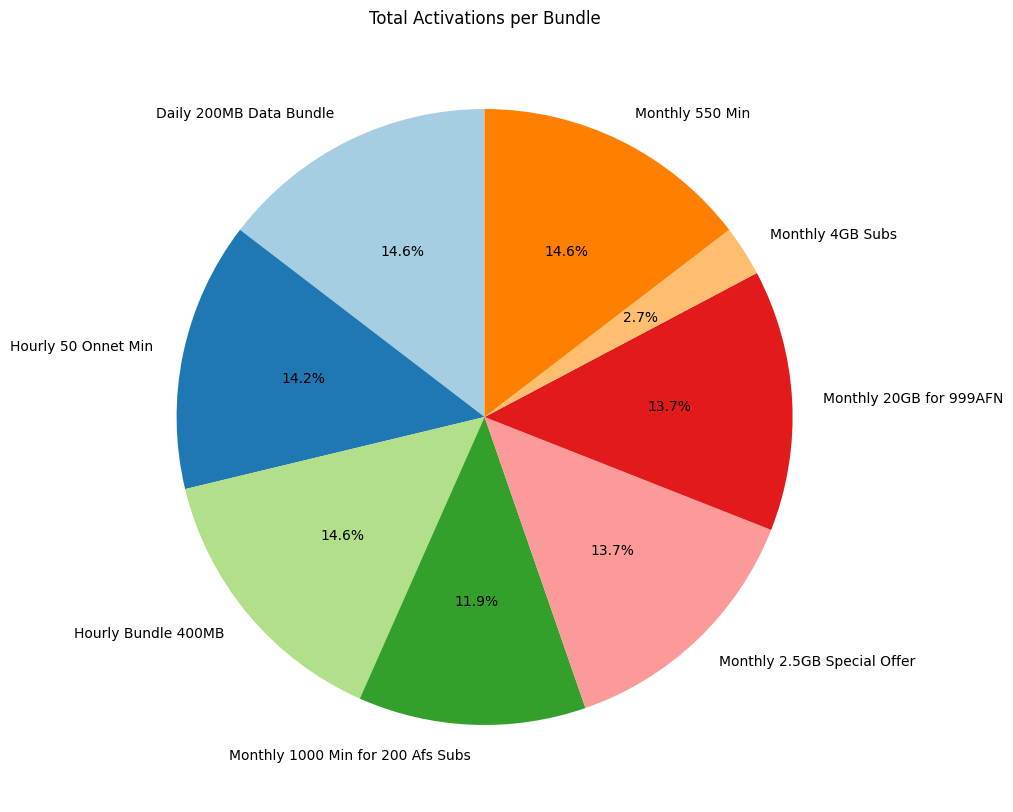

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# If your DataFrame has different column names, adjust accordingly

# Group by 'BUNDLE_NAME' and calculate count of 'SUBSCRIPTION_ID'
total_activations_per_bundle = grouped_data.groupby('BUNDLE_NAME')['TOTAL_ACTIVATIONS'].count().reset_index()

# Plotting
plt.figure(figsize=(10, 10))
colors = plt.cm.Paired(range(len(total_activations_per_bundle)))

plt.pie(
    total_activations_per_bundle['TOTAL_ACTIVATIONS'],
    labels=total_activations_per_bundle['BUNDLE_NAME'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)

plt.title('Total Activations per Bundle')
plt.show()


# User Interactive Matrix

In [198]:
# Getting 10K randomly for ML development
# Don't run it, evey time it changes
# Assuming my_data_set is the original DataFrame
# Replace 10000 with the number of records you want to randomly select
data_set_for_ml = my_data_set.sample(n=10000, random_state=42)

# Now, data_set_for_ml contains 10,000 randomly selected records from my_data_set


In [199]:
# Identify the user, item, and activation columns
user_column = 'SUBSCRIPTION_ID'
item_column = 'BUNDLE_NAME'
activation_column = 'REVENUE'

# Create a binary interaction column (1 for activation, 0 for no activation)
data_set_for_ml['Interaction'] = data_set_for_ml[activation_column].apply(lambda x: 1 if x > 0 else 0)



In [200]:
data_set_for_ml

ACTIVATION_DATE SUBSCRIPTION_ID              BUNDLE_NAME  REVENUE  \
10007       10/3/2023    3890801233.0      Hourly Bundle 400MB     10.0   
40138      10/18/2023    3890771102.0      Hourly Bundle 400MB     10.0   
81626      10/24/2023    3890729614.0  Daily 200MB Data Bundle     15.0   
41326      10/27/2023    3890769914.0  Daily 200MB Data Bundle     30.0   
67575      10/29/2023    3890743665.0      Hourly Bundle 400MB     10.0   
...               ...             ...                      ...      ...   
2804        10/4/2023    3890808436.0      Hourly Bundle 400MB     10.0   
45035      10/30/2023    3890766205.0  Daily 200MB Data Bundle     15.0   
68641       10/6/2023    3890742599.0  Daily 200MB Data Bundle     15.0   
98242       10/9/2023    3890712998.0  Monthly 20GB for 999AFN    999.0   
99384       10/2/2023    3890711856.0  Daily 200MB Data Bundle     15.0   

        PROVINCE LANGUAGE  Interaction  
10007  NANGARHAR   Pashto            1  
40138     GHAZNI     Dari            1  
81626      KABUL   Pashto            1  
41326      KABUL     Dari            1  
67575      KABUL     Dari            1  
...          ...      ...          ...  
2804      PARWAN     Dari            1  
45035      HERAT     Dari            1  
68641      KABUL     Dari            1  
98242      KABUL   Pashto            1  
99384       GHOR     Dari            1  

[10000 rows x 7 columns]

In [201]:
# Create the User-Item Interaction Matrix
user_item_matrix = data_set_for_ml.pivot_table(values='Interaction', index=user_column, columns=item_column, fill_value=0)

In [202]:
#data_set_for_ml.to_csv("./data_set_for_ml.csv")
user_item_matrix

BUNDLE_NAME      Daily 200MB Data Bundle  Hourly 50 Onnet Min  \
SUBSCRIPTION_ID                                                 
3890711264.0                         0.0                  0.0   
3890711273.0                         1.0                  0.0   
3890711291.0                         1.0                  0.0   
3890711292.0                         0.0                  0.0   
3890711308.0                         0.0                  0.0   
...                                  ...                  ...   
3890811133.0                         0.0                  0.0   
3890811143.0                         1.0                  0.0   
3890811162.0                         0.0                  0.0   
3890811180.0                         1.0                  0.0   
3890836.0                            0.0                  0.0   

BUNDLE_NAME      Hourly Bundle 400MB  Monthly 1000 Min for 200 Afs Subs  \
SUBSCRIPTION_ID                                                           
3890711264.0                     1.0                                0.0   
3890711273.0                     0.0                                0.0   
3890711291.0                     0.0                                0.0   
3890711292.0                     1.0                                0.0   
3890711308.0                     1.0                                0.0   
...                              ...                                ...   
3890811133.0                     1.0                                0.0   
3890811143.0                     0.0                                0.0   
3890811162.0                     1.0                                0.0   
3890811180.0                     0.0                                0.0   
3890836.0                        0.0                                0.0   

BUNDLE_NAME      Monthly 2.5GB Special Offer  Monthly 20GB for 999AFN  \
SUBSCRIPTION_ID                                                         
3890711264.0                             0.0                      0.0   
3890711273.0                             0.0                      0.0   
3890711291.0                             0.0                      0.0   
3890711292.0                             0.0                      0.0   
3890711308.0                             0.0                      0.0   
...                                      ...                      ...   
3890811133.0                             0.0                      0.0   
3890811143.0                             0.0                      0.0   
3890811162.0                             0.0                      0.0   
3890811180.0                             0.0                      0.0   
3890836.0                                0.0                      0.0   

BUNDLE_NAME      Monthly 4GB Subs  Monthly 550 Min  
SUBSCRIPTION_ID                                     
3890711264.0                  0.0              0.0  
3890711273.0                  0.0              0.0  
3890711291.0                  0.0              0.0  
3890711292.0                  0.0              0.0  
3890711308.0                  0.0              0.0  
...                           ...              ...  
3890811133.0                  0.0              0.0  
3890811143.0                  0.0              0.0  
3890811162.0                  0.0              0.0  
3890811180.0                  0.0              0.0  
3890836.0                     0.0              1.0  

[10000 rows x 8 columns]

In [203]:
# Convert the pivot table to a NumPy array
user_item_matrix_np = user_item_matrix.to_numpy()

In [204]:
user_item_matrix_np

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [205]:
# Calculate the cosine similarity between all pairs of users
user_similarity_matrix = cosine_similarity(user_item_matrix_np)

In [206]:
user_similarity_matrix

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [207]:
# Convert the similarity matrix to a DataFrame for better visualization
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

In [208]:
user_similarity_df


SUBSCRIPTION_ID  3890711264.0  3890711273.0  3890711291.0  3890711292.0  \
SUBSCRIPTION_ID                                                           
3890711264.0              1.0           0.0           0.0           1.0   
3890711273.0              0.0           1.0           1.0           0.0   
3890711291.0              0.0           1.0           1.0           0.0   
3890711292.0              1.0           0.0           0.0           1.0   
3890711308.0              1.0           0.0           0.0           1.0   
...                       ...           ...           ...           ...   
3890811133.0              1.0           0.0           0.0           1.0   
3890811143.0              0.0           1.0           1.0           0.0   
3890811162.0              1.0           0.0           0.0           1.0   
3890811180.0              0.0           1.0           1.0           0.0   
3890836.0                 0.0           0.0           0.0           0.0   

SUBSCRIPTION_ID  3890711308.0  3890711319.0  3890711325.0  3890711335.0  \
SUBSCRIPTION_ID                                                           
3890711264.0              1.0           1.0           0.0           1.0   
3890711273.0              0.0           0.0           1.0           0.0   
3890711291.0              0.0           0.0           1.0           0.0   
3890711292.0              1.0           1.0           0.0           1.0   
3890711308.0              1.0           1.0           0.0           1.0   
...                       ...           ...           ...           ...   
3890811133.0              1.0           1.0           0.0           1.0   
3890811143.0              0.0           0.0           1.0           0.0   
3890811162.0              1.0           1.0           0.0           1.0   
3890811180.0              0.0           0.0           1.0           0.0   
3890836.0                 0.0           0.0           0.0           0.0   

SUBSCRIPTION_ID  3890711341.0  3890711347.0  ...  3890811114.0  3890811115.0  \
SUBSCRIPTION_ID                              ...                               
3890711264.0              0.0           0.0  ...           1.0           0.0   
3890711273.0              0.0           1.0  ...           0.0           1.0   
3890711291.0              0.0           1.0  ...           0.0           1.0   
3890711292.0              0.0           0.0  ...           1.0           0.0   
3890711308.0              0.0           0.0  ...           1.0           0.0   
...                       ...           ...  ...           ...           ...   
3890811133.0              0.0           0.0  ...           1.0           0.0   
3890811143.0              0.0           1.0  ...           0.0           1.0   
3890811162.0              0.0           0.0  ...           1.0           0.0   
3890811180.0              0.0           1.0  ...           0.0           1.0   
3890836.0                 1.0           0.0  ...           0.0           0.0   

SUBSCRIPTION_ID  3890811123.0  3890811128.0  3890811129.0  3890811133.0  \
SUBSCRIPTION_ID                                                           
3890711264.0              1.0           0.0           0.0           1.0   
3890711273.0              0.0           1.0           1.0           0.0   
3890711291.0              0.0           1.0           1.0           0.0   
3890711292.0              1.0           0.0           0.0           1.0   
3890711308.0              1.0           0.0           0.0           1.0   
...                       ...           ...           ...           ...   
3890811133.0              1.0           0.0           0.0           1.0   
3890811143.0              0.0           1.0           1.0           0.0   
3890811162.0              1.0           0.0           0.0           1.0   
3890811180.0              0.0           1.0           1.0           0.0   
3890836.0                 0.0           0.0           0.0           0.0   

SUBSCRIPTION_ID  3890811143.0  

In [209]:

user_item_matrix

BUNDLE_NAME      Daily 200MB Data Bundle  Hourly 50 Onnet Min  \
SUBSCRIPTION_ID                                                 
3890711264.0                         0.0                  0.0   
3890711273.0                         1.0                  0.0   
3890711291.0                         1.0                  0.0   
3890711292.0                         0.0                  0.0   
3890711308.0                         0.0                  0.0   
...                                  ...                  ...   
3890811133.0                         0.0                  0.0   
3890811143.0                         1.0                  0.0   
3890811162.0                         0.0                  0.0   
3890811180.0                         1.0                  0.0   
3890836.0                            0.0                  0.0   

BUNDLE_NAME      Hourly Bundle 400MB  Monthly 1000 Min for 200 Afs Subs  \
SUBSCRIPTION_ID                                                           
3890711264.0                     1.0                                0.0   
3890711273.0                     0.0                                0.0   
3890711291.0                     0.0                                0.0   
3890711292.0                     1.0                                0.0   
3890711308.0                     1.0                                0.0   
...                              ...                                ...   
3890811133.0                     1.0                                0.0   
3890811143.0                     0.0                                0.0   
3890811162.0                     1.0                                0.0   
3890811180.0                     0.0                                0.0   
3890836.0                        0.0                                0.0   

BUNDLE_NAME      Monthly 2.5GB Special Offer  Monthly 20GB for 999AFN  \
SUBSCRIPTION_ID                                                         
3890711264.0                             0.0                      0.0   
3890711273.0                             0.0                      0.0   
3890711291.0                             0.0                      0.0   
3890711292.0                             0.0                      0.0   
3890711308.0                             0.0                      0.0   
...                                      ...                      ...   
3890811133.0                             0.0                      0.0   
3890811143.0                             0.0                      0.0   
3890811162.0                             0.0                      0.0   
3890811180.0                             0.0                      0.0   
3890836.0                                0.0                      0.0   

BUNDLE_NAME      Monthly 4GB Subs  Monthly 550 Min  
SUBSCRIPTION_ID                                     
3890711264.0                  0.0              0.0  
3890711273.0                  0.0              0.0  
3890711291.0                  0.0              0.0  
3890711292.0                  0.0              0.0  
3890711308.0                  0.0              0.0  
...                           ...              ...  
3890811133.0                  0.0              0.0  
3890811143.0                  0.0              0.0  
3890811162.0                  0.0              0.0  
3890811180.0                  0.0              0.0  
3890836.0                     0.0              1.0  

[10000 rows x 8 columns]

In [211]:
# Define a function to get users who need to activate certain bundles based on their similar users
def get_users_to_activate_bundles(user_item_matrix, user_similarity_matrix, bundle_name, N=3, threshold=0.7):
    user_recommendations = {}
    
    for target_user in user_item_matrix.index:
        print('target User: ',target_user)
        target_user_data = user_item_matrix.loc[target_user]
        print('target user data : ' , target_user_data)
        
    
        '''
        # Check if the target user has already activated the bundle
        if target_user_data[bundle_name] == 0:
            # Get the top N similar users who have activated the specified bundle
            similar_users = user_similarity_matrix[target_user].sort_values(ascending=False)
            top_similar_users = similar_users[(similar_users >= threshold) & (user_item_matrix.loc[similar_users.index, bundle_name] == 1)].head(N)
            
            # Store the recommendations
            user_recommendations[target_user] = top_similar_users.index.tolist()
    
    return user_recommendations
    '''

# Specify the bundle you want to recommend (e.g., 'Daily 1GB for 50 Afs Subscription')
bundle_to_recommend = 'Monthly 2.5GB Special Offer'

# Get users who need to activate the specified bundle based on their similar users (e.g., top 5 similar users)
users_to_activate_bundle = get_users_to_activate_bundles(user_item_matrix, user_similarity_matrix, bundle_to_recommend, N=5)


target User:  3890711264.0
target user data :  BUNDLE_NAME
Daily 200MB Data Bundle              0.0
Hourly 50 Onnet Min                  0.0
Hourly Bundle 400MB                  1.0
Monthly 1000 Min for 200 Afs Subs    0.0
Monthly 2.5GB Special Offer          0.0
Monthly 20GB for 999AFN              0.0
Monthly 4GB Subs                     0.0
Monthly 550 Min                      0.0
Name: 3890711264.0, dtype: float64
target User:  3890711273.0
target user data :  BUNDLE_NAME
Daily 200MB Data Bundle              1.0
Hourly 50 Onnet Min                  0.0
Hourly Bundle 400MB                  0.0
Monthly 1000 Min for 200 Afs Subs    0.0
Monthly 2.5GB Special Offer          0.0
Monthly 20GB for 999AFN              0.0
Monthly 4GB Subs                     0.0
Monthly 550 Min                      0.0
Name: 3890711273.0, dtype: float64
target User:  3890711291.0
target user data :  BUNDLE_NAME
Daily 200MB Data Bundle              1.0
Hourly 50 Onnet Min                  0.0
Hourly Bundle 4

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



BUNDLE_NAME
Daily 200MB Data Bundle              1.0
Hourly 50 Onnet Min                  0.0
Hourly Bundle 400MB                  0.0
Monthly 1000 Min for 200 Afs Subs    0.0
Monthly 2.5GB Special Offer          0.0
Monthly 20GB for 999AFN              0.0
Monthly 4GB Subs                     0.0
Monthly 550 Min                      0.0
Name: 3890810456.0, dtype: float64
target User:  3890810458.0
target user data :  BUNDLE_NAME
Daily 200MB Data Bundle              1.0
Hourly 50 Onnet Min                  0.0
Hourly Bundle 400MB                  0.0
Monthly 1000 Min for 200 Afs Subs    0.0
Monthly 2.5GB Special Offer          0.0
Monthly 20GB for 999AFN              0.0
Monthly 4GB Subs                     0.0
Monthly 550 Min                      0.0
Name: 3890810458.0, dtype: float64
target User:  3890810502.0
target user data :  BUNDLE_NAME
Daily 200MB Data Bundle              1.0
Hourly 50 Onnet Min                  0.0
Hourly Bundle 400MB                  0.0
Monthly 1000 Min for 

In [212]:
user_similarity_df.head(3)

SUBSCRIPTION_ID  3890711264.0  3890711273.0  3890711291.0  3890711292.0  \
SUBSCRIPTION_ID                                                           
3890711264.0              1.0           0.0           0.0           1.0   
3890711273.0              0.0           1.0           1.0           0.0   
3890711291.0              0.0           1.0           1.0           0.0   

SUBSCRIPTION_ID  3890711308.0  3890711319.0  3890711325.0  3890711335.0  \
SUBSCRIPTION_ID                                                           
3890711264.0              1.0           1.0           0.0           1.0   
3890711273.0              0.0           0.0           1.0           0.0   
3890711291.0              0.0           0.0           1.0           0.0   

SUBSCRIPTION_ID  3890711341.0  3890711347.0  ...  3890811114.0  3890811115.0  \
SUBSCRIPTION_ID                              ...                               
3890711264.0              0.0           0.0  ...           1.0           0.0   
3890711273.0              0.0           1.0  ...           0.0           1.0   
3890711291.0              0.0           1.0  ...           0.0           1.0   

SUBSCRIPTION_ID  3890811123.0  3890811128.0  3890811129.0  3890811133.0  \
SUBSCRIPTION_ID                                                           
3890711264.0              1.0           0.0           0.0           1.0   
3890711273.0              0.0           1.0           1.0           0.0   
3890711291.0              0.0           1.0           1.0           0.0   

SUBSCRIPTION_ID  3890811143.0  3890811162.0  3890811180.0  3890836.0  
SUBSCRIPTION_ID                                                       
3890711264.0              0.0           1.0           0.0        0.0  
3890711273.0              1.0           0.0           1.0        0.0  
3890711291.0              1.0           0.0           1.0        0.0  

[3 rows x 10000 columns]

In [216]:
## fucntion to find the recommendation

###### Define a function to get users who need to activate certain bundles based on their similar users
def get_users_to_activate_bundles(user_item_matrix, user_similarity_matrix, bundle_name, N=3, threshold=0.4):
    user_recommendations = {}
    for target_user in user_item_matrix.index:
        #print(target_user)
        target_user_data = user_item_matrix.loc[target_user]
        #print('target user data' , target_user_data)

    #Check if the target user has already activated the bundle
        if target_user_data[bundle_name] == 0:  
            # Here we get the similar users and at the same time droping the target user from the list 
            similar_users = user_similarity_df[target_user].sort_values(ascending=False).drop(target_user)
            #print('user simi' , similar_users)
            
            #Now we are ready to get the top users based on the N provided and at the same time checking if they activated the given bundle
            similar_user_activation = user_item_matrix.loc[similar_users.index, bundle_name] == 1 

            #print(type(similar_user_activation))

            #Now we only get those customers that have actualy activated the 
            true_subscriptions = similar_user_activation[similar_user_activation].index
            #print('Activation' , true_subscriptions)

        
            #And based on the condition of Threshold we have to get that customers that are realy close based on Cosine Similarity
            #top_similar_users = true_subscriptions[(similar_users >= threshold)].head(N)
            similar_users_with_true_activation = similar_users[true_subscriptions]
            #print('TRUE ' ,similar_users_with_true_activation) 

            top_similar_users = similar_users_with_true_activation[(similar_users_with_true_activation >= threshold)].head(N)

            #print('TOP ' , top_similar_users)

            # Store the recommendations
            user_recommendations[target_user] = top_similar_users.index.tolist() 
            #print('rec',user_recommendations)
    
    return user_recommendations



In [217]:
# Specify the bundle you want to recommend (e.g., 'Weekly 1.5GB for 149 AFN Subs')
bundle_to_recommend = 'Monthly 2.5GB Special Offer'

# Get users who need to activate the specified bundle based on their similar users (e.g., top 3 similar users)
users_to_activate_bundle = get_users_to_activate_bundles(user_item_matrix, user_similarity_df, bundle_to_recommend, N=3)

# Getting only the Users list and then combine them with bundle_to_recommend
user_recommendations=list(users_to_activate_bundle.keys())
recommendation_final = pd.DataFrame({'subscription_id': user_recommendations, 'bundle_to_recommend': bundle_to_recommend})

recommendation_final



subscription_id          bundle_to_recommend
0       3890711264.0  Monthly 2.5GB Special Offer
1       3890711273.0  Monthly 2.5GB Special Offer
2       3890711291.0  Monthly 2.5GB Special Offer
3       3890711292.0  Monthly 2.5GB Special Offer
4       3890711308.0  Monthly 2.5GB Special Offer
...              ...                          ...
9856    3890811133.0  Monthly 2.5GB Special Offer
9857    3890811143.0  Monthly 2.5GB Special Offer
9858    3890811162.0  Monthly 2.5GB Special Offer
9859    3890811180.0  Monthly 2.5GB Special Offer
9860       3890836.0  Monthly 2.5GB Special Offer

[9861 rows x 2 columns]

In [62]:
import pandas as pd
import unittest


In [63]:
class TestGetUsersToActivateBundles(unittest.TestCase):

    def setUp(self):
        # Sample user_item_matrix
        data = {
            'SUBSCRIPTION_ID': [19942400, 289227863, 413420637, 447529411, 515256392, 609716162, 712096945,
                                242243425, 551231134, 113132445, 853537687, 866501191, 897691801, 909324638],
            'Monthly 20GB for 999AFN': [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
            'Monthly 6GB for 499AFN': [0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1],
            'Weekly 1.5GB for 149 AFN Subs': [0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0]
        }
        self.user_item_matrix = pd.DataFrame(data)
        
        # Sample user_similarity_matrix (you can customize this)
        data = {
            'SUBSCRIPTION_ID': [19942400, 289227863, 413420637, 447529411, 515256392, 609716162, 712096945,
                                242243425, 551231134, 113132445, 853537687, 866501191, 897691801, 909324638],
            'Similarity': [0.7, 0.5, 0.8, 0.6, 0.9, 0.75, 0.85, 0.65, 0.7, 0.7, 0.8, 0.9, 0.4, 0.6]
        }
        self.user_similarity_matrix = pd.DataFrame(data)


In [64]:
    def test_recommendations(self):
        bundle_to_recommend = 'Weekly 1.5GB for 149 AFN Subs'
        N = 3
        threshold = 0.4

        user_recommendations = get_users_to_activate_bundles(
            self.user_item_matrix,
            self.user_similarity_matrix,
            bundle_to_recommend,
            N=N,
            threshold=threshold
        )

        # Expected recommendations
        expected_recommendations = {
            19942400 : [515256392],
            413420637: [515256392, 712096945, 866501191],
            447529411: [515256392, 712096945, 866501191],
            609716162: [515256392, 712096945, 866501191],
            551231134: [712096945, 866501191],
            113132445: [712096945, 866501191],
            897691801: [],
            909324638: [712096945, 866501191]
        }

        self.assertEqual(user_recommendations, expected_recommendations)


In [65]:
import unittest

# Define your test class and test cases here

# Create a test suite and run it within the cell
test_suite = unittest.defaultTestLoader.loadTestsFromTestCase(TestGetUsersToActivateBundles)
result = unittest.TextTestRunner(verbosity=2).run(test_suite)

# Check the test results
if result.wasSuccessful():
    print("All tests passed successfully.")
else:
    print("Some tests failed.")



----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK


All tests passed successfully.


# As you can see above the Test has been success fully done

In [66]:
user_ids = list(users_to_activate_bundle.keys())
user_ids

[19942400,
 113132445,
 413420637,
 447529411,
 551231134,
 609716162,
 897691801,
 909324638]

In [67]:
user_ids = list(users_to_activate_bundle.keys())
user_ids

[19942400,
 113132445,
 413420637,
 447529411,
 551231134,
 609716162,
 897691801,
 909324638]

In [68]:
recommendation_final = pd.DataFrame({'subscription_id': user_ids, 'bundle_to_recommend': bundle_to_recommend})

recommendation_final

subscription_id            bundle_to_recommend
0         19942400  Weekly 1.5GB for 149 AFN Subs
1        113132445  Weekly 1.5GB for 149 AFN Subs
2        413420637  Weekly 1.5GB for 149 AFN Subs
3        447529411  Weekly 1.5GB for 149 AFN Subs
4        551231134  Weekly 1.5GB for 149 AFN Subs
5        609716162  Weekly 1.5GB for 149 AFN Subs
6        897691801  Weekly 1.5GB for 149 AFN Subs
7        909324638  Weekly 1.5GB for 149 AFN Subs

# Now let's save our Model

In [221]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def get_users_to_activate_bundles(data, bundle_name, N=3, threshold=0.7):
    # Importing the dataset
    my_data_set = pd.read_csv(data)

    # Identify the user, item, and activation columns
    user_column = 'SUBSCRIPTION_ID'
    item_column = 'BUNDLE_NAME'
    activation_column = 'REVENUE'

    # Create a binary interaction column (1 for activation, 0 for no activation)
    my_data_set['Interaction'] = my_data_set[activation_column].apply(lambda x: 1 if x > 0 else 0)

    # Create the User-Item Interaction Matrix
    user_item_matrix = my_data_set.pivot_table(values='Interaction', index=user_column, columns=item_column, fill_value=0)

    # Convert the pivot table to a NumPy array
    user_item_matrix_np = user_item_matrix.to_numpy()

    # Calculate the cosine similarity between all pairs of users
    user_similarity_matrix = cosine_similarity(user_item_matrix_np)

    # Convert the similarity matrix to a DataFrame for better visualization
    user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

    user_recommendations = {}
    for target_user in user_item_matrix.index:
        target_user_data = user_item_matrix.loc[target_user]
        if target_user_data[bundle_name] == 0:
            similar_users = user_similarity_df[target_user].sort_values(ascending=False).drop(target_user)
            similar_user_activation = user_item_matrix.loc[similar_users.index, bundle_name] == 1 
            true_subscriptions = similar_user_activation[similar_user_activation].index
            similar_users_with_true_activation = similar_users[true_subscriptions]
            top_similar_users = similar_users_with_true_activation[(similar_users_with_true_activation >= threshold)].head(N)
            user_recommendations[target_user] = top_similar_users.index.tolist()

    recommendations = list(user_recommendations.keys())
    recommendation_final = pd.DataFrame({'subscription_id': recommendations, 'bundle_to_recommend': bundle_name})
    return recommendation_final

In [222]:
#testing if my function works correctly or not
rec= get_users_to_activate_bundles("./data_bundle.csv","Weekly 1.5GB for 149 AFN Subs")
rec

subscription_id            bundle_to_recommend
0         19942400  Weekly 1.5GB for 149 AFN Subs
1        113132445  Weekly 1.5GB for 149 AFN Subs
2        413420637  Weekly 1.5GB for 149 AFN Subs
3        447529411  Weekly 1.5GB for 149 AFN Subs
4        551231134  Weekly 1.5GB for 149 AFN Subs
5        609716162  Weekly 1.5GB for 149 AFN Subs
6        897691801  Weekly 1.5GB for 149 AFN Subs
7        909324638  Weekly 1.5GB for 149 AFN Subs

In [72]:
# now let's make a cloass of our model to use it out of the jupyter

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import pickle

class RecommendationModel:
    def __init__(self):
        self.user_item_matrix = None
        self.user_similarity_df = None

    def load_data(self, file_path):
        # Load data from CSV file
        my_data_set = pd.read_csv(file_path)

        # Identify columns
        user_column = 'SUBSCRIPTION_ID'
        item_column = 'BUNDLE_NAME'
        activation_column = 'REVENUE'

        # Create a binary interaction column
        my_data_set['Interaction'] = my_data_set[activation_column].apply(lambda x: 1 if x > 0 else 0)

        # Create the User-Item Interaction Matrix
        self.user_item_matrix = my_data_set.pivot_table(values='Interaction', index=user_column, columns=item_column,
                                                        fill_value=0)

        # Convert the pivot table to a NumPy array
        user_item_matrix_np = self.user_item_matrix.to_numpy()

        # Calculate cosine similarity between all pairs of users
        user_similarity_matrix = cosine_similarity(user_item_matrix_np)

        # Convert the similarity matrix to a DataFrame
        self.user_similarity_df = pd.DataFrame(user_similarity_matrix, index=self.user_item_matrix.index,
                                               columns=self.user_item_matrix.index)

    def save_model(self, model_path):
        # Save the model to a file
        with open(model_path, 'wb') as file:
            pickle.dump(self, file)

    @staticmethod
    def load_model(model_path):
        # Load the model from a file
        with open(model_path, 'rb') as file:
            return pickle.load(file)

    def get_users_to_activate_bundles(self, bundle_name, N=3, threshold=0.7):
        user_recommendations = {}
        for target_user in self.user_item_matrix.index:
            target_user_data = self.user_item_matrix.loc[target_user]
            if target_user_data[bundle_name] == 0:
                similar_users = self.user_similarity_df[target_user].sort_values(ascending=False).drop(target_user)
                similar_user_activation = self.user_item_matrix.loc[similar_users.index, bundle_name] == 1
                true_subscriptions = similar_user_activation[similar_user_activation].index
                similar_users_with_true_activation = similar_users[true_subscriptions]
                top_similar_users = similar_users_with_true_activation[
                    (similar_users_with_true_activation >= threshold)].head(N)
                user_recommendations[target_user] = top_similar_users.index.tolist()

        recommendations = list(user_recommendations.keys())
        recommendation_final = pd.DataFrame({'subscription_id': recommendations, 'bundle_to_recommend': bundle_name})
        return recommendation_final


# Example usage:
# model = RecommendationModel()
# model.load_data("./data_bundle.csv")
# model.save_model("bundle_recommendation_model.pkl")


In [73]:
# Example usage:
model = RecommendationModel()
model.load_data("./data_bundle.csv")
model.save_model("bundle_recommendation_model.pkl")

# Wanna Talk With DataFrame?

In [234]:
import pandas as pd
import sketch

# Create a sample Pandas DataFrame
data = pd.read_csv("./data_bundle.csv")
df = pd.DataFrame(data)

# Use Sketch functionalities
df.sketch.ask("what are the columns")


In [17]:
import pandas as pd
import sketch
import pickle

def create_sketch_model(df, question):
    # Use Sketch functionalities
    return df.sketch.ask(question)

# Example usage
data = pd.read_csv("./data_bundle.csv")
df = pd.DataFrame(data)
question = "what are the max of usage in each province"
model = create_sketch_model(df, question)
print("model is :")

# Save the model object to a file
with open("sketch_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)


model is :


In [25]:
# Import necessary libraries
import pandas as pd
import sketch

# Function to create a sketch model
def create_sketch_model(data: pd.DataFrame, question: str):
    # Create a sample Pandas DataFrame
    df = pd.DataFrame(data)
    
    # Use Sketch functionalities
    answer = df.sketch.ask(question)
    
    return answer

# Load your dataset
data = pd.read_csv("./data_bundle.csv")

# Example usage
question = "What are the min of usage in each province?"
sketch_model = create_sketch_model(data, question)

# Save the model to a file
sketch_model.save_model("sketch_model.pkl")


AttributeError: 'NoneType' object has no attribute 'save_model'

AttributeError: 'NoneType' object has no attribute 'save'

# Let's do the Testing with SK-Learning NearestNeighbor ML model

In [224]:
# here we put the scenario in SKlearn 

import pandas as pd
from sklearn.neighbors import NearestNeighbors
import warnings
import time 

def get_users_to_activate_bundles_knn(data, bundle_name, N=3, threshold=0.4):
    #start_time = time.time()

    # Importing the dataset
    my_data_set = pd.read_csv(data)

    # Identify the user, item, and activation columns
    user_column = 'SUBSCRIPTION_ID'
    item_column = 'BUNDLE_NAME'
    activation_column = 'REVENUE'

    # Create a binary interaction column (1 for activation, 0 for no activation)
    my_data_set['Interaction'] = my_data_set[activation_column].apply(lambda x: 1 if x > 0 else 0)

    # Create the User-Item Interaction Matrix
    user_item_matrix = my_data_set.pivot_table(values='Interaction', index=user_column, columns=item_column, fill_value=0)

    # Suppress sklearn warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        # Fit the Nearest Neighbors model
        model = NearestNeighbors(metric='cosine', algorithm='brute')
        model.fit(user_item_matrix)

    user_recommendations = {}
    for target_user in user_item_matrix.index:
        target_user_data = user_item_matrix.loc[target_user]

        if target_user_data[bundle_name] == 0:
            target_user_data_array = target_user_data.to_numpy().reshape(1, -1)
            
            # Suppress sklearn warnings during prediction
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")

                distances, indices = model.kneighbors(target_user_data_array, n_neighbors=N+1)

            # Exclude the target user itself from the recommendations
            similar_users = user_item_matrix.index[indices.flatten()][1:]

            # Filter similar users based on the threshold
            similar_users_with_true_activation = similar_users[user_item_matrix.loc[similar_users, bundle_name] == 1]
            top_similar_users = similar_users_with_true_activation[:N]
            user_recommendations[target_user] = top_similar_users.tolist()
    # Calculate overall elapsed time
    #end_time = time.time()
    #elapsed_time = end_time - start_time
    #print(f"Overall time taken: {elapsed_time} seconds")
            

    recommendations = list(user_recommendations.keys())
    recommendation_final = pd.DataFrame({'subscription_id': recommendations, 'bundle_to_recommend': bundle_name})
    return recommendation_final

In [225]:
testing=get_users_to_activate_bundles_knn("./train_data.csv",'Monthly 6GB for 499AFN')

In [226]:
df = pd.read_csv("./data_bundle - Copy.csv")
actual_activations = df


In [97]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("./data_bundle - Copy.csv")
# Assuming your data is in a DataFrame called df
# Drop rows with missing values for simplicity
df = df.dropna()

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

train_data.to_csv("./train_data.csv", index=False)
test_data.to_csv("./test_data.csv", index=False)

# Train the model on the training data
train_recommendations = get_users_to_activate_bundles_knn("./train_data.csv", 'Monthly 20GB for 999AFN')

# Test the model on the testing data
test_recommendations = get_users_to_activate_bundles_knn("./test_data.csv", 'Monthly 20GB for 999AFN')

# Evaluate the recommendations (you need to have actual activations in your testing set)
# For simplicity, let's assume you have a DataFrame called actual_activations
precision = len(set(test_recommendations['subscription_id']).intersection(actual_activations['SUBSCRIPTION_ID'])) / len(test_recommendations)
recall = len(set(test_recommendations['subscription_id']).intersection(actual_activations['SUBSCRIPTION_ID'])) / len(actual_activations)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Precision: 1.00
Recall: 0.18


In [88]:
train_data

ACTIVATION_DATE  SUBSCRIPTION_ID  REVENUE GENDER   PROVINCE Language  \
1120        9/24/2023      291246295.0       10   Male      KABUL   Pashto   
9186        9/24/2023      942048622.0       17   Male    HELMAND   Pashto   
7802        9/30/2023      937823890.0       17   Male  NANGARHAR   Pashto   
5039        9/29/2023      859284262.0       10   Male      KABUL     Dari   
7832        9/29/2023      937660014.0       17   Male  NANGARHAR  English   
...               ...              ...      ...    ...        ...      ...   
5192        9/27/2023      932519159.0       10   Male  NANGARHAR  English   
13419       9/29/2023      804224558.0       17   Male    BAGHLAN     Dari   
5391        9/28/2023      934280151.0       17   Male    BAGHLAN     Dari   
861         9/26/2023      862968404.0       17   Male      KABUL   Pashto   
7271        9/28/2023      692294940.0       10   Male      KABUL     Dari   

                   BUNDLE_NAME  
1120       Hourly Bundle 400MB  
9186   Daily 200MB Data Bundle  
7802   Daily 200MB Data Bundle  
5039       Hourly Bundle 400MB  
7832   Daily 200MB Data Bundle  
...                        ...  
5192       Hourly Bundle 400MB  
13419  Daily 200MB Data Bundle  
5391   Daily 200MB Data Bundle  
861    Daily 200MB Data Bundle  
7271       Hourly Bundle 400MB  

[11093 rows x 7 columns]

In [89]:
test_data

ACTIVATION_DATE  SUBSCRIPTION_ID  REVENUE  GENDER PROVINCE Language  \
7815        9/24/2023      854835931.0       17    Male  BAGHLAN     Dari   
1881        9/30/2023      913027036.0       10    Male  BAGHLAN   Pashto   
7439        9/28/2023      937907588.0       10    Male    KABUL     Dari   
4890        9/26/2023      934290766.0       17    Male  HELMAND   Pashto   
3195        9/25/2023      451711584.0       10    Male  BAGHLAN     Dari   
...               ...              ...      ...     ...      ...      ...   
7799        9/24/2023      937640033.0       10  Female    KABUL     Dari   
1879        9/25/2023      910999933.0       15  Female   Parwan   Pashto   
13407       9/29/2023      851530484.0       50    Male  BAGHLAN     Dari   
13216       9/29/2023      428916784.0       55    Male    Herat  English   
12373       9/30/2023      589211008.0       55    Male   Parwan     Dari   

                             BUNDLE_NAME  
7815             Daily 200MB Data Bundle  
1881                 Hourly Bundle 400MB  
7439                 Hourly Bundle 400MB  
4890             Daily 200MB Data Bundle  
3195                 Hourly Bundle 400MB  
...                                  ...  
7799                 Hourly Bundle 400MB  
1879             Daily 200MB Data Bundle  
13407  Daily 1GB for 50 Afs Subscription  
13216           Weekly 425MB Data Bundle  
12373           Weekly 425MB Data Bundle  

[2774 rows x 7 columns]

In [90]:
train_recommendations

subscription_id      bundle_to_recommend
0            396227.0  Monthly 20GB for 999AFN
1            998046.0  Monthly 20GB for 999AFN
2           1025739.0  Monthly 20GB for 999AFN
3           1300059.0  Monthly 20GB for 999AFN
4           1940368.0  Monthly 20GB for 999AFN
...               ...                      ...
9127      945053402.0  Monthly 20GB for 999AFN
9128      945112741.0  Monthly 20GB for 999AFN
9129      945113076.0  Monthly 20GB for 999AFN
9130      945274818.0  Monthly 20GB for 999AFN
9131      946194450.0  Monthly 20GB for 999AFN

[9132 rows x 2 columns]

In [91]:
test_recommendations

subscription_id      bundle_to_recommend
0           2958741.0  Monthly 20GB for 999AFN
1           4384899.0  Monthly 20GB for 999AFN
2           5143566.0  Monthly 20GB for 999AFN
3           5591424.0  Monthly 20GB for 999AFN
4           6578013.0  Monthly 20GB for 999AFN
...               ...                      ...
2520      944323580.0  Monthly 20GB for 999AFN
2521      945025274.0  Monthly 20GB for 999AFN
2522      945043756.0  Monthly 20GB for 999AFN
2523      946194450.0  Monthly 20GB for 999AFN
2524      946204049.0  Monthly 20GB for 999AFN

[2525 rows x 2 columns]

Precision: 1.00
Recall: 0.04
Confusion Matrix:
[[530]]


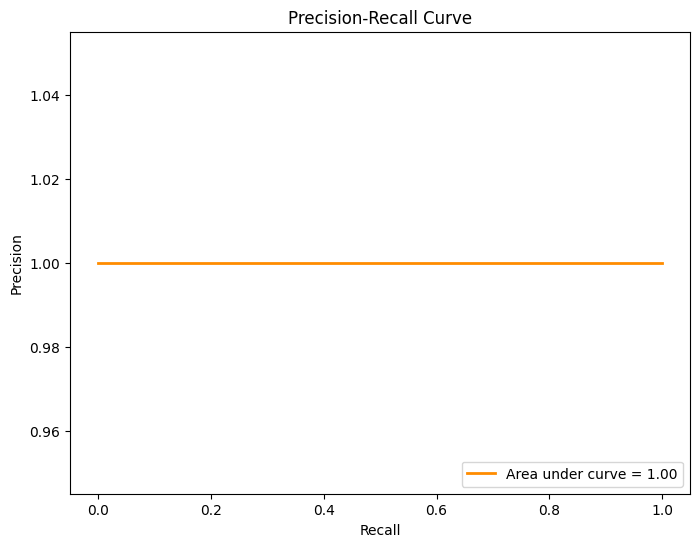

In [232]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc

# Assuming you have a function actual_activations_func() to load actual activations
#actual_activations 

# Train the model on the training data
train_recommendations = get_users_to_activate_bundles_knn("./train_data.csv", 'Monthly 20GB for 999AFN')

# Test the model on the testing data
test_recommendations = get_users_to_activate_bundles_knn("./test_data.csv", 'Monthly 20GB for 999AFN')

# Evaluate the recommendations
intersection_set = set(test_recommendations['subscription_id']).intersection(actual_activations['SUBSCRIPTION_ID'])

# Precision and Recall Calculation
precision = len(intersection_set) / len(test_recommendations)
recall = len(intersection_set) / len(actual_activations)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Confusion Matrix
y_true = [1 if sub_id in intersection_set else 0 for sub_id in test_recommendations['subscription_id']]
y_scores = [1] * len(intersection_set) + [0] * (len(test_recommendations) - len(intersection_set))

conf_matrix = confusion_matrix(y_true, y_scores)
print('Confusion Matrix:')
print(conf_matrix)

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_scores)
area_under_curve = auc(recall_curve, precision_curve)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='darkorange', lw=2, label=f'Area under curve = {area_under_curve:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()
